In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Tue Jul 11 09:29:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%cd /content/drive/MyDrive/yolo


/content/drive/MyDrive/yolo


In [ ]:
!ls


data  data.yaml


In [ ]:
# install yolo
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 627.5/627.5 kB 16.9 MB/s eta 0:00:00


In [10]:
from ultralytics import YOLO

from IPython.display import display ,Image

In [7]:
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=224 plots=True

100% 21.5M/21.5M [00:00<00:00, 64.7MB/s]
Ultralytics YOLOv8.0.132 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=F

In [8]:
!ls runs/detect/train/

args.yaml					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch120.jpg
events.out.tfevents.1689068093.324de06cbb81.3496.0  train_batch121.jpg
F1_curve.png					    train_batch122.jpg
labels_correlogram.jpg				    train_batch1.jpg
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    weights
results.csv


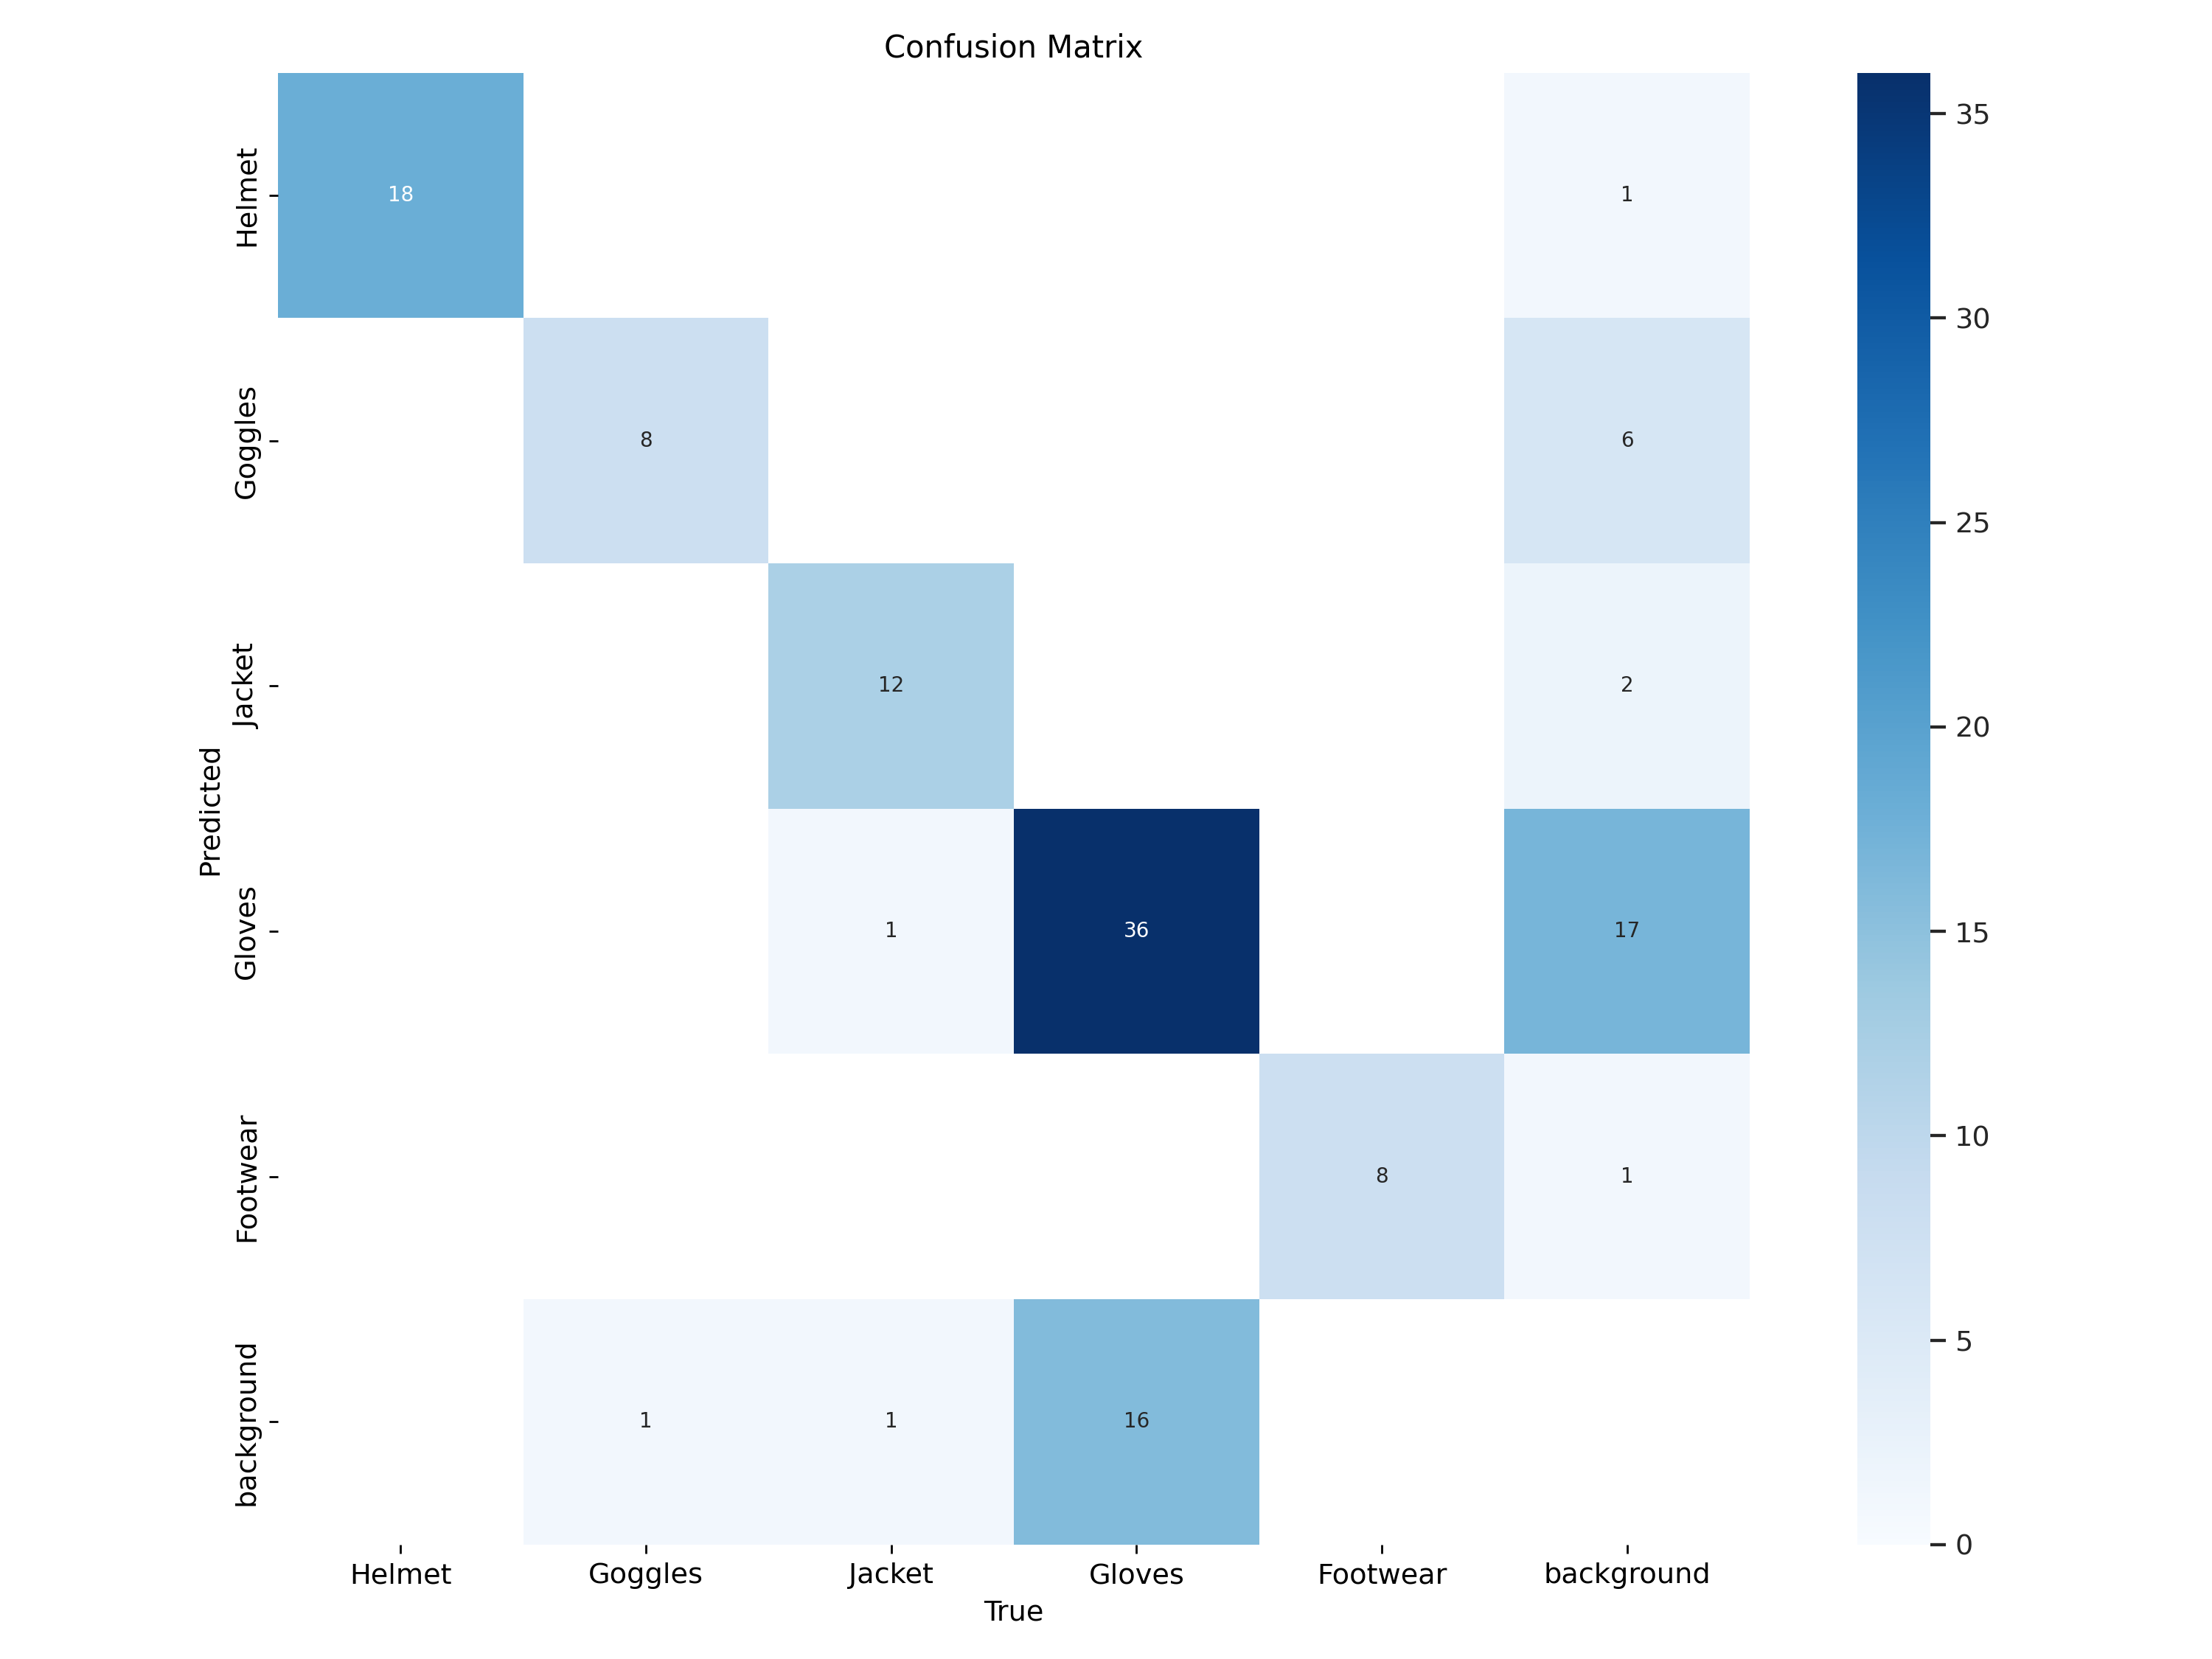

In [12]:
Image(filename='/content/drive/MyDrive/yolo/runs/detect/train/confusion_matrix.png', width=600)

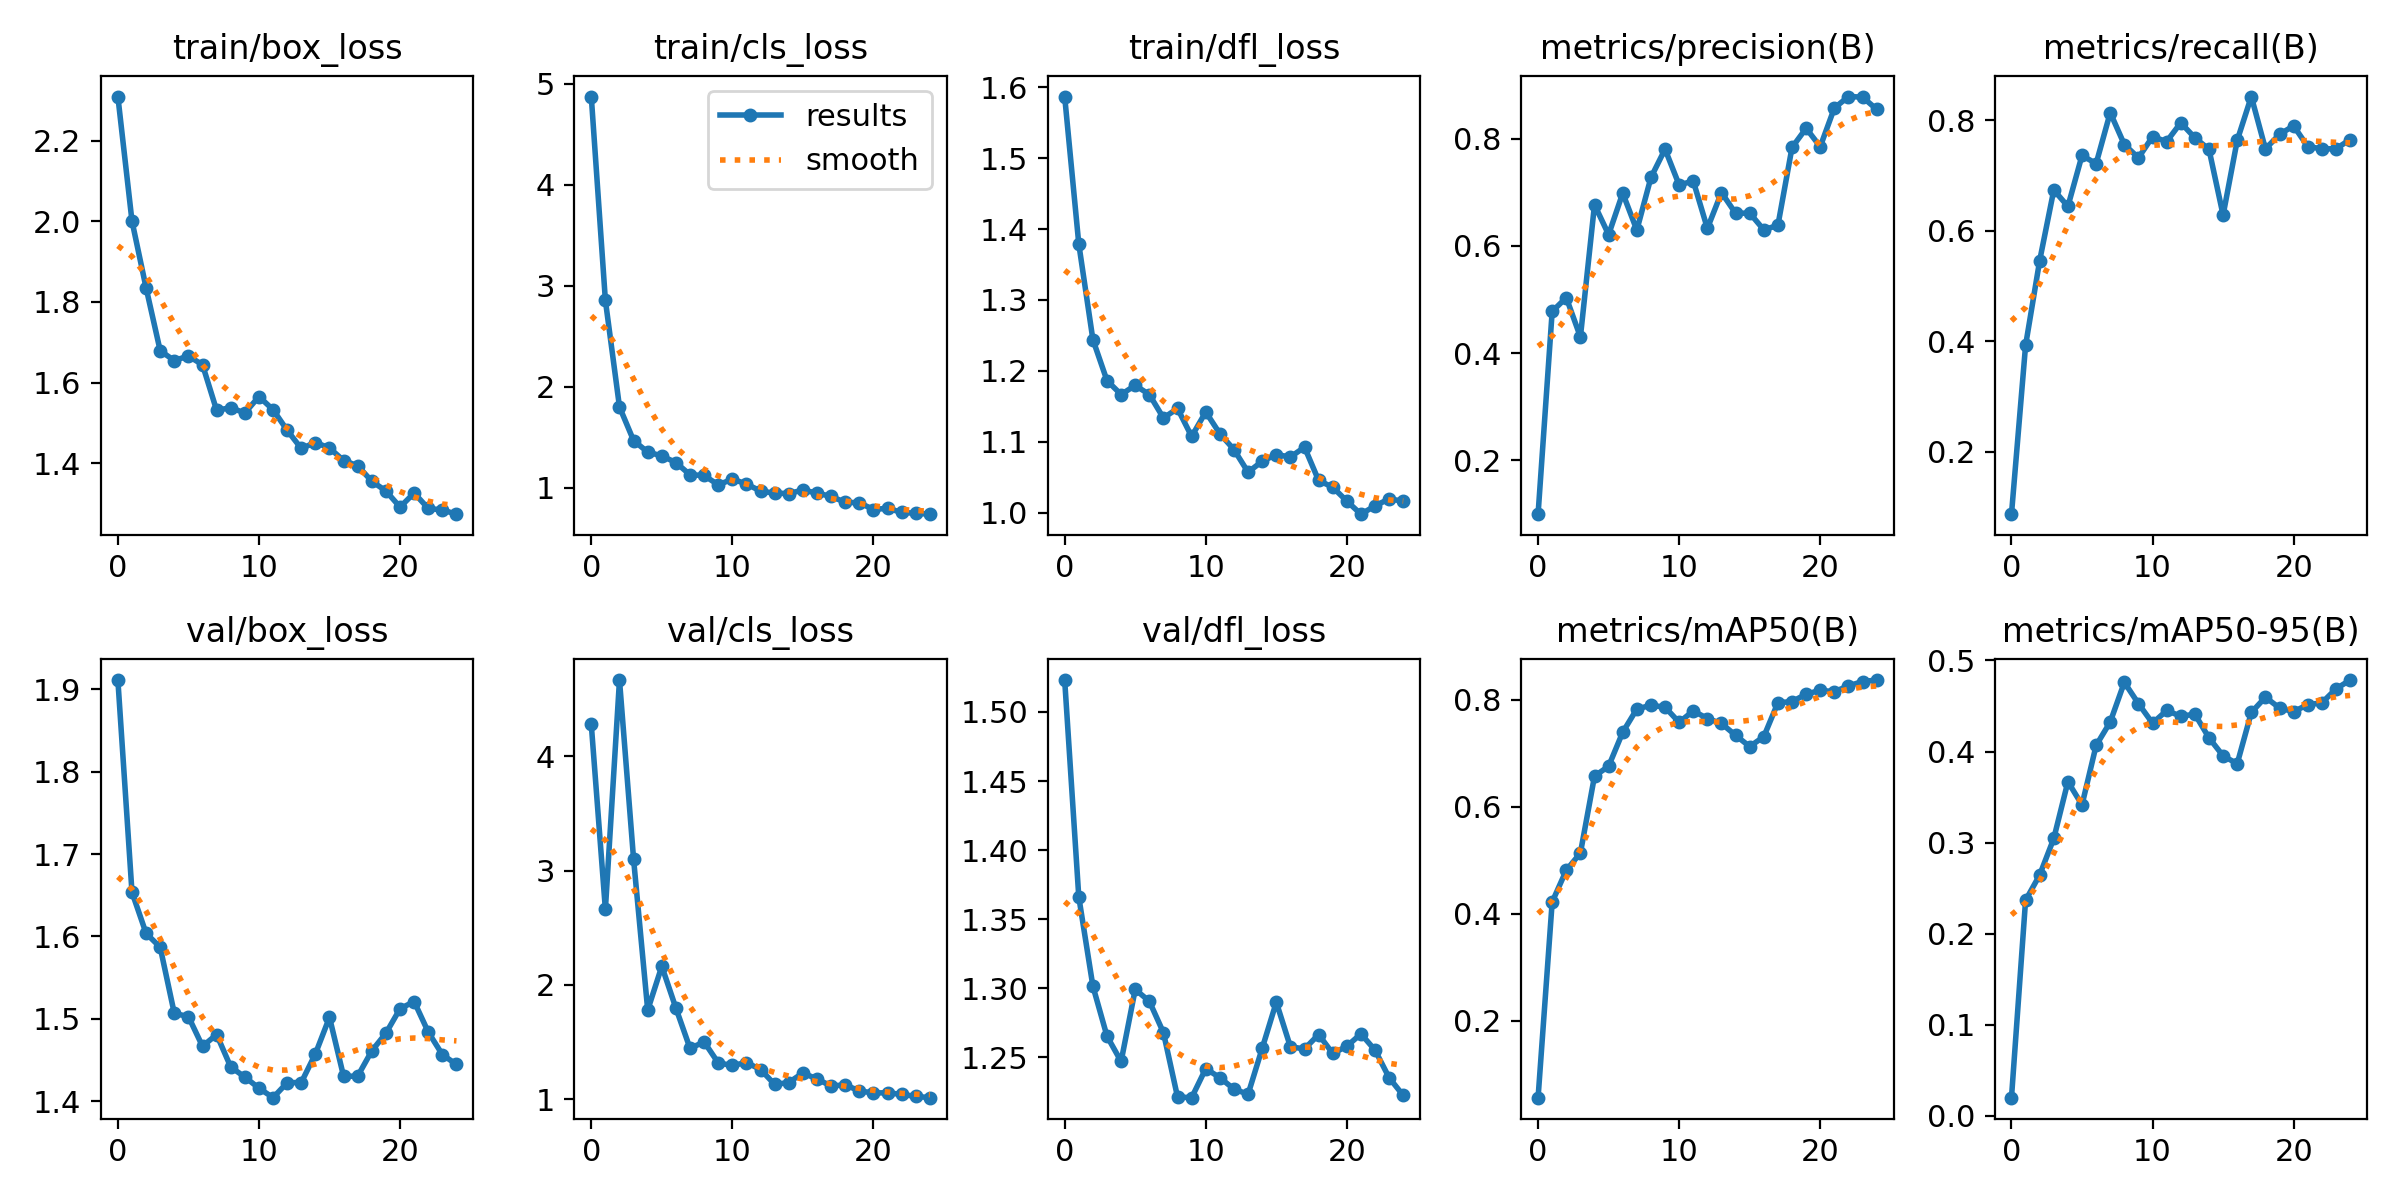

In [13]:
Image(filename='/content/drive/MyDrive/yolo/runs/detect/train/results.png', width=600)

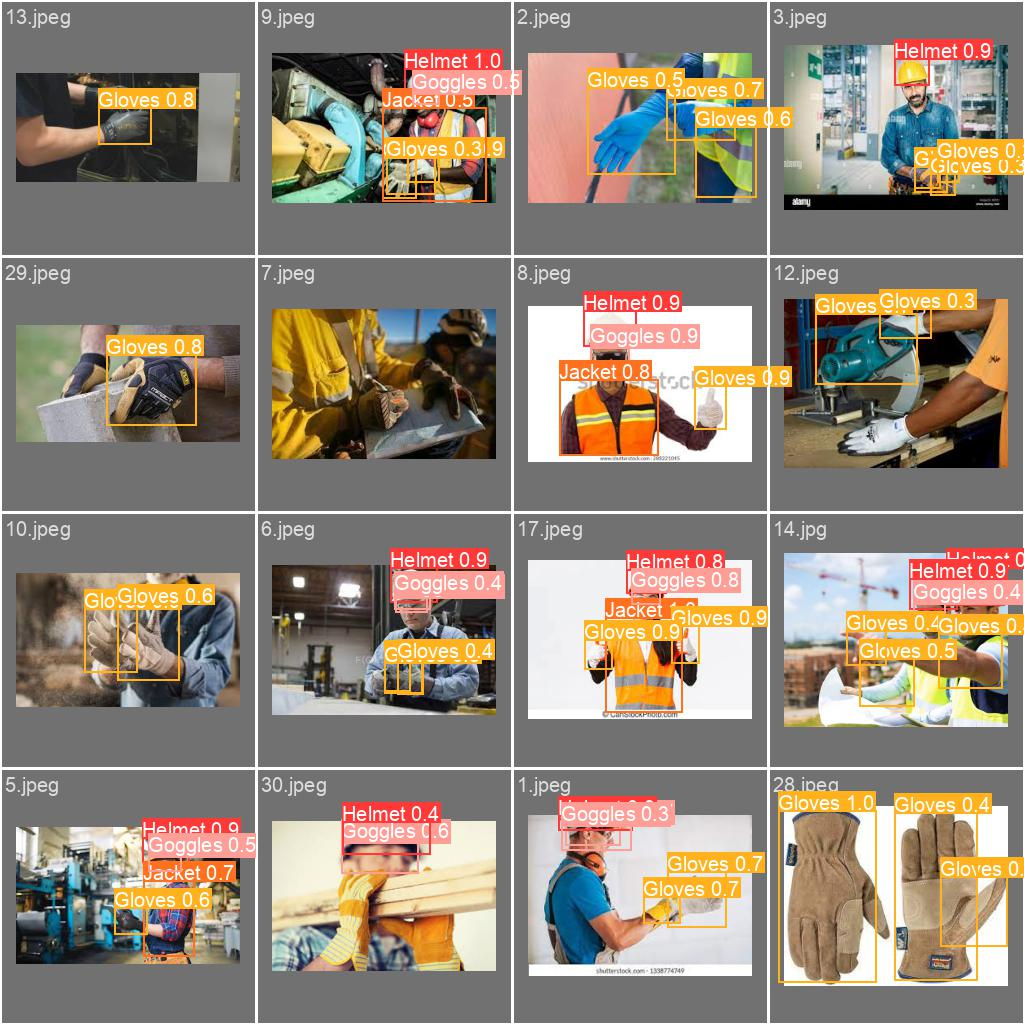

In [14]:
Image(filename='/content/drive/MyDrive/yolo/runs/detect/train/val_batch0_pred.jpg', width=600)

Validate Custom Model

In [15]:
!yolo task=detect mode=val model=/content/drive/MyDrive/yolo/runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.0.132 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/yolo/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100% 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.75it/s]
                   all         31        101      0.753      0.868      0.838      0.476
                Helmet         31         18      0.915          1      0.995      0.677
               Goggles         31          9      0.494      0.778      0.598       0.27
                Jacket         31         14      0.786      0.929       0.88      0.589
                Gloves         31         52      0.667      0.635      0.724      0.398
              Footwear         31          8      0.902          1      0.995      0.445
Speed: 0.0ms preprocess, 19.9ms inference, 0.0ms los

Inference with Custom Model

In [16]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/yolo/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/yolo/data/test/images

Ultralytics YOLOv8.0.132 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients

image 1/31 /content/drive/MyDrive/yolo/data/test/images/1.jpeg: 192x224 2 Goggless, 2 Glovess, 94.9ms
image 2/31 /content/drive/MyDrive/yolo/data/test/images/10.jpeg: 160x224 3 Glovess, 92.7ms
image 3/31 /content/drive/MyDrive/yolo/data/test/images/11.jpeg: 224x224 4 Glovess, 10.8ms
image 4/31 /content/drive/MyDrive/yolo/data/test/images/12.jpeg: 192x224 2 Glovess, 8.9ms
image 5/31 /content/drive/MyDrive/yolo/data/test/images/13.jpeg: 128x224 1 Gloves, 87.5ms
image 6/31 /content/drive/MyDrive/yolo/data/test/images/14(1).jpeg: 224x224 2 Glovess, 8.3ms
image 7/31 /content/drive/MyDrive/yolo/data/test/images/14.jpg: 192x224 2 Helmets, 2 Goggless, 3 Glovess, 8.5ms
image 8/31 /content/drive/MyDrive/yolo/data/test/images/15.jpeg: 224x224 3 Jackets, 1 Gloves, 8.2ms
image 9/31 /content/drive/MyDrive/yolo/data/test/images/16.jpeg: 224x160 1

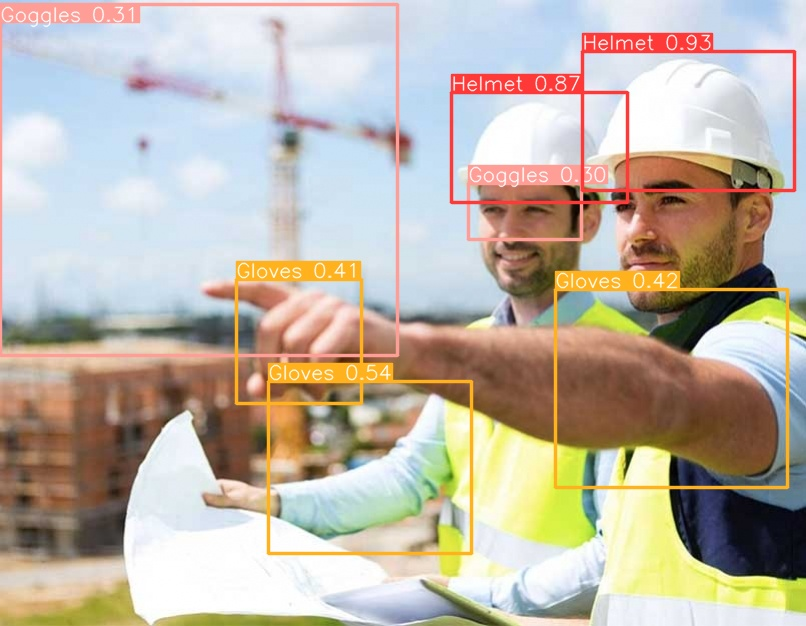

In [21]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/drive/MyDrive/yolo/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")